## Init

In [1]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *

import matplotlib.pyplot as plt
import roadrunner
import numpy as np
import pandas as pd

## Create an example Model

In [4]:
model = ModelBuilder('SimpleCascade')

A_species = ['A0', 'A1']
B_species = ['B0', 'B1']
C_species = ['C']

for specie in A_species:
    model.add_reaction(Reaction(michaelis_menten, (specie+'p',), (specie,)))
    model.add_reaction(Reaction(michaelis_menten, (specie,), (specie+'p',)))

for specie in B_species:
    model.add_reaction(Reaction(michaelis_menten_stim, (specie+'p',), (specie,), extra_states=('A'+specie[1]+'p',)))
    model.add_reaction(Reaction(michaelis_menten, (specie,), (specie+'p',)))
    
for specie in C_species:
    model.add_reaction(Reaction(michaelis_menten, (specie+'p',), (specie,)))
    model.add_reaction(Reaction(michaelis_menten, (specie,), (specie+'p',)))
    
# add stimulation reactions

print(model.get_antimony_model())

model SimpleCascade

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; J3_Vmax*A1/(J3_Km + A1)
J4: B0p -> B0; J4_Vmax*B0p*A0p/(J4_Km + B0p)
J5: B0 -> B0p; J5_Vmax*B0/(J5_Km + B0)
J6: B1p -> B1; J6_Vmax*B1p*A1p/(J6_Km + B1p)
J7: B1 -> B1p; J7_Vmax*B1/(J7_Km + B1)
J8: Cp -> C; J8_Vmax*Cp/(J8_Km + Cp)
J9: C -> Cp; J9_Vmax*C/(J9_Km + C)

# State variables in the system
A0p=0
A0=100
A1p=0
A1=100
B0p=0
B0=100
B1p=0
B1=100
Cp=0
C=100

# Parameters in the system
J0_Km=100
J0_Vmax=10
J1_Km=100
J1_Vmax=10
J2_Km=100
J2_Vmax=10
J3_Km=100
J3_Vmax=10
J4_Km=100
J4_Vmax=10
J5_Km=100
J5_Vmax=10
J6_Km=100
J6_Vmax=10
J7_Km=100
J7_Vmax=10
J8_Km=100
J8_Vmax=10
J9_Km=100
J9_Vmax=10

# Other variables in the system


end


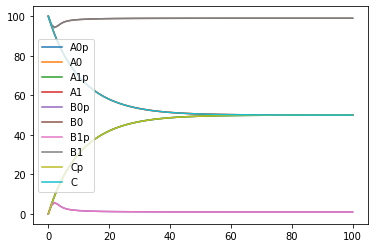

In [5]:
runner = roadrunner.RoadRunner(model.get_sbml_model())
res = runner.simulate(0, 100, 100)


states = model.get_state_variables().keys()
for s in states:
    # print(s)
    plt.plot(res['time'], res[f'[{s}]'], label=s)

plt.legend()
plt.show()

## Construst a more complex model based on rules

This script generates an arbitrarily large biochemical ODE system with the following limitations:
- A === B 
- Only 1 C specie
- No feedback regulations / crosstalk

In [4]:
R1 = Reaction(michaelis_menten, (specie+'p',), (specie,))
print(michaelis_menten.parameters_count)

2


In [ ]:
NA = 10
NB = 10
NC = 1
NR = 0

mean_range_species = (5, 500)
sd_range_species = (1, 100)

mean_range_params = (0.01, 1)
sd_range_params = (0.01, 1)

model = ModelBuilder('SimpleCascade2')

# based on the `NA` parameter, create a number of species for A

A_species = [f'A{i}' for i in range(NA)]
B_species = [f'B{i}' for i in range(NB)]
C_species = ['C']

# convert a list of species to a tuple of species
B_species_tuple_phos = []
for b in B_species:
    b_specie_phos = b + 'p'
    B_species_tuple_phos.append(b_specie_phos)
    
B_species_tuple_phos = tuple(B_species_tuple_phos)


for specie in A_species:
    # generate a random set of parameters for reaction A -> Ap
    r_params = []
    for i in range(michaelis_menten.parameters_count):
        rand = np.random.random()*mean_range_params[1]
        r_params.append(rand)
        
    # add the reaction Ap -> A to the model    
    model.add_reaction(Reaction(michaelis_menten, (specie+'p',), (specie,), 
                                parameters_values=tuple(r_params)))
    
    # generate a random initial value for A
    random_mean = np.random.randint(mean_range_species[0], mean_range_species[1])
    # generate a random set of parameters for reaction Ap -> A
    r_params_reverse = []
    for i in range(michaelis_menten.parameters_count):
        rand = np.random.random()*mean_range_params[1]
        r_params_reverse.append(rand)
        
    # add the reaction Ap -> A to the model    
    model.add_reaction(Reaction(michaelis_menten, (specie,), (specie+'p',), 
                                reactant_values=random_mean, 
                                parameters_values=tuple(r_params_reverse)))

for specie in B_species:
    # generate a random set of parameters for reaction B -> Bp
    r_params = []
    for i in range(michaelis_menten_stim.parameters_count):
        rand = np.random.random()*mean_range_params[1]
        r_params.append(rand)
    
    # add the reaction Bp -> B to the model
    model.add_reaction(Reaction(michaelis_menten_stim, (specie+'p',), (specie,), 
                                extra_states=('A'+specie[1]+'p',),
                                parameters_values=tuple(r_params)))
    
    # generate a random initial value for B
    random_mean = np.random.randint(mean_range_species[0], mean_range_species[1])
    
    # generate a random set of parameters for reaction B -> Bp
    r_params_reverse = []
    for i in range(michaelis_menten.parameters_count):
        rand = np.random.random()*mean_range_params[1]
        r_params_reverse.append(rand)
    
    # add the reaction B -> Bp to the model
    model.add_reaction(Reaction(michaelis_menten, (specie,), (specie+'p',), 
                                reactant_values=random_mean,
                                parameters_values=tuple(r_params_reverse)))
    

# randomise the number of stimulators and inhibitors for len(B_species) 

stimulator_number = np.random.randint(0, len(B_species))
inhibitor_number = len(B_species) - stimulator_number   

rate_law_C = create_archtype_michaelis_menten(stimulators=stimulator_number,
                                              stimulator_weak=0, 
                                              allosteric_inhibitors=inhibitor_number, 
                                              competitive_inhibitors=0)    
    
for specie in C_species:
    model.add_reaction(Reaction(rate_law_C, (specie+'p',), (specie,), extra_states=B_species_tuple_phos))
    model.add_reaction(Reaction(michaelis_menten, (specie,), (specie+'p',)))
    
# add stimulation reactions

print(model.get_antimony_model())

model SimpleCascade2

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; J3_Vmax*A1/(J3_Km + A1)
J4: A2p -> A2; J4_Vmax*A2p/(J4_Km + A2p)
J5: A2 -> A2p; J5_Vmax*A2/(J5_Km + A2)
J6: A3p -> A3; J6_Vmax*A3p/(J6_Km + A3p)
J7: A3 -> A3p; J7_Vmax*A3/(J7_Km + A3)
J8: A4p -> A4; J8_Vmax*A4p/(J8_Km + A4p)
J9: A4 -> A4p; J9_Vmax*A4/(J9_Km + A4)
J10: A5p -> A5; J10_Vmax*A5p/(J10_Km + A5p)
J11: A5 -> A5p; J11_Vmax*A5/(J11_Km + A5)
J12: A6p -> A6; J12_Vmax*A6p/(J12_Km + A6p)
J13: A6 -> A6p; J13_Vmax*A6/(J13_Km + A6)
J14: A7p -> A7; J14_Vmax*A7p/(J14_Km + A7p)
J15: A7 -> A7p; J15_Vmax*A7/(J15_Km + A7)
J16: A8p -> A8; J16_Vmax*A8p/(J16_Km + A8p)
J17: A8 -> A8p; J17_Vmax*A8/(J17_Km + A8)
J18: A9p -> A9; J18_Vmax*A9p/(J18_Km + A9p)
J19: A9 -> A9p; J19_Vmax*A9/(J19_Km + A9)
J20: B0p -> B0; J20_Vmax*B0p*A0p/(J20_Km + B0p)
J21: B0 -> B0p; J21_Vmax*B0/(J21_Km + B0)
J22: B1p -> B1; J22_Vmax*B1p*A1p/(J22_Km + B1p)
J23: B1 ->

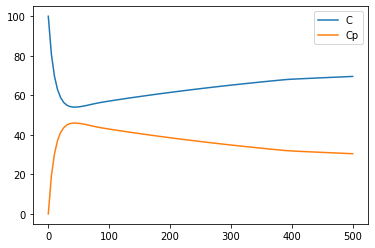

In [6]:
runner = roadrunner.RoadRunner(model.get_sbml_model())
res = runner.simulate(0, 500, 100)


states = model.get_state_variables().keys()

visible_states = ['C', 'Cp']

for s in visible_states:
    # print(s)
    plt.plot(res['time'], res[f'[{s}]'], label=s)

plt.legend()
plt.show()

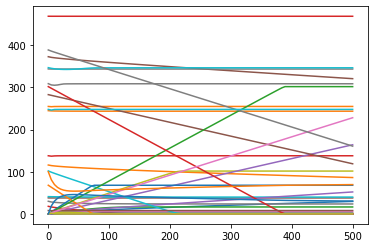

In [7]:
runner = roadrunner.RoadRunner(model.get_sbml_model())
res = runner.simulate(0, 500, 100)


states = model.get_state_variables().keys()

visible_states = ['C', 'Cp']

for s in states:
    # print(s)
    plt.plot(res['time'], res[f'[{s}]'], label=s)

# plt.legend()
plt.show()

## Complex model with feedback 
- to use the NR parameter and generate random crosstalks

### Construction

In [3]:
# fix np random seed for reproducibility
random_seed_number = 4 # None if do not want to fix the seed
if random_seed_number is not None:
    np.random.seed(random_seed_number)

# print(f'Chosen Seed: {}')

NA = 30
NR = 0

mean_range_species = (5, 5000)
rangeScale_params = (0.1, 10)
rangeMultiplier_params = (0.7,1.3)
randomise_parameters = True 

print('--- Generating a random network ---')
print(f'Random Seed: {random_seed_number}')
print(f'Number of A Species: {NA}')
print(f'Number of B Species: {NA}')
print(f'Number of C Species: 1')
print(f'Number of Regulations: {NR}')
print(f'Mean Range Species: {mean_range_species}')
print(f'Scale Range Parameters: {rangeScale_params}')
print(f'Multiplier Range Parameters: {rangeMultiplier_params}')
print(f'Randomise Parameters: {randomise_parameters}')
print('\n')


model = ModelBuilder('FeedbackRegulationTwoLayerCascade')

# based on the `NA` parameter, create a number of species for A

A_species = [f'A{i}' for i in range(NA)]
B_species = [f'B{i}' for i in range(NA)]
C_species = ['C']

# based on the number of NR, create random connections between any two species in the network
regulation_types_choice = ['up', 'down']
regulations = []
reg_types = []

all_species = A_species + B_species + C_species
B_and_C = B_species + C_species

# max attempts is the permutation of specie C and B * 100
max_attempt = len(B_and_C)**2 * 100
current_attempt = 0
while len(regulations) < NR and current_attempt < max_attempt:
    from_specie = np.random.choice(B_and_C)
    to_specie = np.random.choice(all_species)
    reg = (from_specie, to_specie)
    reverse_reg = (to_specie, from_specie)
    
    # also exclude self-regulations and B -> C regulations
    if from_specie == to_specie or (from_specie in B_species and to_specie in C_species):
        continue
    
    if reg not in regulations and reverse_reg not in regulations:
        reg_type = np.random.choice(regulation_types_choice)
        regulations.append(reg)
        reg_types.append(reg_type)
        

if current_attempt == max_attempt:
    print('Failed to generate the network in the given number of attempts, max attempt:', max_attempt)
    exit(1)
    
for i, reg in enumerate(regulations):
    print(f'Feedback Regulation {i}: {reg} - {reg_types[i]}')
    
# finally, each Ap index affects every B -> Bp reaction index
for i in range(NA):
    regulations.append((f'A{i}', f'B{i}'))
    reg_types.append('up')
    print(f'A to B Stimulation {i+NR}: {f"A{i}"} - {f"B{i}"} - up')



def generate_archtype_and_regulators(all_regulations, all_regulation_types):
    
    regulators_for_specie = []
    for i, reg in enumerate(all_regulations):
        if reg[1] == specie:
            reg_type = all_regulation_types[i]
            regulators_for_specie.append((reg[0], reg_type))

    if len(regulators_for_specie) == 0:
        return michaelis_menten, ()

    total_up_regulations = len([r for r in regulators_for_specie if r[1] == 'up'])
    total_down_regulations = len([r for r in regulators_for_specie if r[1] == 'down'])

    rate_law = create_archtype_michaelis_menten(stimulators=0,
                                                stimulator_weak=total_up_regulations,
                                                allosteric_inhibitors=0,
                                                competitive_inhibitors=total_down_regulations)
    
    # sort the regulators by type, up first and down second
    regulators_for_specie = sorted(regulators_for_specie, key=lambda x: x[1], reverse=True)
    regulators_sorted = [r[0] for r in regulators_for_specie]
    regulators_sorted_phos = [r[0]+'p' for r in regulators_for_specie]

    # print(f'Sorted regulators information: {regulators_for_specie}')
    # print(f'Final regulators for {specie}: {regulators_sorted_phos}')
    # print(f'Rate law for {specie}: {rate_law}')
    
    return rate_law, regulators_sorted_phos


# generate random parameters informed by a scale 
def generate_random_parameters(reaction_archtype: ReactionArchtype, scale_range, multiplier_range):
    
    assumed_values = reaction_archtype.assume_parameters_values
    # print(f'Assumed values: {assumed_values}')
    r_params = []
    for key, value in assumed_values.items():
        rand = np.random.uniform(value*scale_range[0], value*scale_range[1])
        rand *= np.random.uniform(multiplier_range[0], multiplier_range[1])
        r_params.append(rand)
    
    return tuple(r_params)

# convert a list of species to a tuple of species
B_species_tuple_phos = []
for b in B_species:
    b_specie_phos = b + 'p'
    B_species_tuple_phos.append(b_specie_phos)
    
B_species_tuple_phos = tuple(B_species_tuple_phos)




'''A Specie reactions'''

for specie in A_species:
    
    # create the rate law for the specie
    rate_law, regulators = generate_archtype_and_regulators(regulations, reg_types)
            
    
    # generate a random set of parameters for reaction A -> Ap
    r_params = michaelis_menten.assume_parameters_values.values()
    if randomise_parameters:
        r_params = generate_random_parameters(michaelis_menten, rangeScale_params, rangeMultiplier_params)
        
    # add the reaction Ap -> A to the model    
    model.add_reaction(Reaction(michaelis_menten, (specie+'p',), (specie,), 
                                parameters_values=tuple(r_params)))
    
    # generate a random initial value for A
    random_mean = np.random.randint(mean_range_species[0], mean_range_species[1])
    
    # generate a random set of parameters for reaction Ap -> A
    r_params_reverse = rate_law.assume_parameters_values.values()
    if randomise_parameters:
        r_params_reverse = generate_random_parameters(rate_law, rangeScale_params, rangeMultiplier_params)
        
    # add the reaction Ap -> A to the model    
    model.add_reaction(Reaction(rate_law, (specie,), (specie+'p',), 
                                reactant_values=random_mean, 
                                extra_states=regulators,
                                parameters_values=tuple(r_params_reverse)))

'''B Specie reactions'''

for specie in B_species:
    # create the rate law for the specie
    rate_law, regulators = generate_archtype_and_regulators(regulations, reg_types)
    
    # generate a random set of parameters for reaction B -> Bp
    r_params = michaelis_menten.assume_parameters_values.values()
    if randomise_parameters:
        r_params = generate_random_parameters(michaelis_menten, rangeScale_params, rangeMultiplier_params)
    
    # add the reaction Bp -> B to the model
    model.add_reaction(Reaction(michaelis_menten, (specie+'p',), (specie,), 
                                parameters_values=tuple(r_params)))
    
    # generate a random initial value for B
    random_mean = np.random.randint(mean_range_species[0], mean_range_species[1])
    
    # generate a random set of parameters for reaction B -> Bp
    r_params_reverse = rate_law.assume_parameters_values.values()
    if randomise_parameters:
        r_params_reverse = generate_random_parameters(rate_law, rangeScale_params, rangeMultiplier_params)
    
    # add the reaction B -> Bp to the model
    model.add_reaction(Reaction(rate_law, (specie,), (specie+'p',), 
                                reactant_values=random_mean,
                                extra_states=regulators,
                                parameters_values=tuple(r_params_reverse)))
    

'''C Specie reactions'''
# randomise the number of stimulators and inhibitors for len(B_species) 

stimulator_number = np.random.randint(0, len(B_species))
if stimulator_number == 0:
    strong_stimulators = 0
    weak_stimulators = 0
else:
    strong_stimulators = np.random.randint(0, stimulator_number)
    weak_stimulators = stimulator_number - strong_stimulators
    
strong_stimulators = 0
weak_stimulators = stimulator_number - strong_stimulators
    
inhibitor_number = len(B_species) - stimulator_number 
if inhibitor_number == 0:
    allosteric_inhibitors = 0
    competitive_inhibitors = 0 
else:
    allosteric_inhibitors = np.random.randint(0, inhibitor_number)
    competitive_inhibitors = inhibitor_number - allosteric_inhibitors

print(f'Stimulators: {stimulator_number}, Inhibitors: {inhibitor_number}')  
print(f'Strong Stimulators: {strong_stimulators}, Weak Stimulators: {weak_stimulators}')
print(f'Allosteric Inhibitors: {allosteric_inhibitors}, Competitive Inhibitors: {competitive_inhibitors}')
rate_law_C = create_archtype_michaelis_menten(stimulators=strong_stimulators,
                                              stimulator_weak=weak_stimulators, 
                                              allosteric_inhibitors=allosteric_inhibitors, 
                                              competitive_inhibitors=competitive_inhibitors)    

c_params = rate_law_C.assume_parameters_values.values()
if randomise_parameters:
    c_params = generate_random_parameters(rate_law_C, rangeScale_params, rangeMultiplier_params)

for specie in C_species:
    model.add_reaction(Reaction(rate_law_C, (specie,), (specie+'p',), extra_states=B_species_tuple_phos, parameters_values=tuple(c_params)))
    model.add_reaction(Reaction(michaelis_menten, (specie+'p',), (specie,), reactant_values=0, product_values=100))


model.precompile()    
# add stimulation reactions

print('Model States: ', len(model.states))
print('Model Parameters: ', len(model.parameters))
print('Model Reactions: ', len(model.reactions))
print('\n')
print('--- Antimony Model ---')
print('\n')
print(model.get_antimony_model())
print('\n')

--- Generating a random network ---
Random Seed: 4
Number of A Species: 30
Number of B Species: 30
Number of C Species: 1
Number of Regulations: 0
Mean Range Species: (5, 5000)
Scale Range Parameters: (0.1, 10)
Multiplier Range Parameters: (0.7, 1.3)
Randomise Parameters: True


A to B Stimulation 0: A0 - B0 - up
A to B Stimulation 1: A1 - B1 - up
A to B Stimulation 2: A2 - B2 - up
A to B Stimulation 3: A3 - B3 - up
A to B Stimulation 4: A4 - B4 - up
A to B Stimulation 5: A5 - B5 - up
A to B Stimulation 6: A6 - B6 - up
A to B Stimulation 7: A7 - B7 - up
A to B Stimulation 8: A8 - B8 - up
A to B Stimulation 9: A9 - B9 - up
A to B Stimulation 10: A10 - B10 - up
A to B Stimulation 11: A11 - B11 - up
A to B Stimulation 12: A12 - B12 - up
A to B Stimulation 13: A13 - B13 - up
A to B Stimulation 14: A14 - B14 - up
A to B Stimulation 15: A15 - B15 - up
A to B Stimulation 16: A16 - B16 - up
A to B Stimulation 17: A17 - B17 - up
A to B Stimulation 18: A18 - B18 - up
A to B Stimulation 19: A19 -

#### Construction class

In [19]:
class ModelSpecification:

    def __init__(self):
        self.A_species = []
        self.B_species = []
        self.C_species = []
        self.regulations = []
        self.randomise_parameters = True
        self.regulation_types = []
        self.C_weak_stimulators = 0
        self.C_strong_stimulators = 0
        self.C_allosteric_inhibitors = 0
        self.C_competitive_inhibitors = 0
        
    def __str__(self):
        # return a string representation of the object, which is its current states 
        return f'A Species: {self.A_species}\n' + \
                f'B Species: {self.B_species}\n' + \
                f'C Species: {self.C_species}\n' + \
                f'Regulations: {self.regulations}\n' + \
                f'Regulation Types: {self.regulation_types}\n' + \
                f'C Weak Stimulators: {self.C_weak_stimulators}\n' + \
                f'C Strong Stimulators: {self.C_strong_stimulators}\n' + \
                f'C Allosteric Inhibitors: {self.C_allosteric_inhibitors}\n' + \
                f'C Competitive Inhibitors: {self.C_competitive_inhibitors}\n'

    def generate_specifications(self, random_seed, NA, NR, verbose=1):
        random_seed_number = random_seed  # None if do not want to fix the seed
        if random_seed_number is not None:
            np.random.seed(random_seed_number)
            
        if verbose == 1:
            print('--- Generating a random network ---')
            print(f'Random Seed: {random_seed_number}')
            print(f'Number of A Species: {NA}')
            print(f'Number of B Species: {NA}')
            print(f'Number of C Species: 1')
            print(f'Number of Regulations: {NR}')
            print('\n')

        # based on the `NA` parameter, create a number of species for A

        A_species = [f'A{i}' for i in range(NA)]
        B_species = [f'B{i}' for i in range(NA)]
        C_species = ['C']

        self.A_species = A_species
        self.B_species = B_species
        self.C_species = C_species
        
        # based on the number of NR, create random connections between any two species in the network
        regulation_types_choice = ['up', 'down']
        regulations = []
        reg_types = []

        all_species = A_species + B_species + C_species
        B_and_C = B_species + C_species

        # max attempts is the permutation of specie C and B * 100
        max_attempt = len(B_and_C)**2 * 100
        current_attempt = 0
        while len(regulations) < NR and current_attempt < max_attempt:
            from_specie = np.random.choice(B_and_C)
            to_specie = np.random.choice(all_species)
            reg = (from_specie, to_specie)
            reverse_reg = (to_specie, from_specie)

            # also exclude self-regulations and B -> C regulations
            if from_specie == to_specie or (from_specie in B_species and to_specie in C_species):
                continue

            if reg not in regulations and reverse_reg not in regulations:
                reg_type = np.random.choice(regulation_types_choice)
                regulations.append(reg)
                reg_types.append(reg_type)


        if current_attempt == max_attempt:
            print('Failed to generate the network in the given number of attempts, max attempt:', max_attempt)
            exit(1)

        for i, reg in enumerate(regulations):
            if verbose == 1:
                print(f'Feedback Regulation {i}: {reg} - {reg_types[i]}')

        # finally, each Ap index affects every B -> Bp reaction index
        for i in range(NA):
            regulations.append((f'A{i}', f'B{i}'))
            reg_types.append('up')
            if verbose == 1:
                print(f'A to B Stimulation {i+NR}: {f"A{i}"} - {f"B{i}"} - up')
                
        self.regulations = regulations
        self.regulation_types = reg_types
        
        # randomise the number of stimulators and inhibitors for len(B_species) 

        stimulator_number = np.random.randint(0, len(B_species))
        if stimulator_number == 0:
            strong_stimulators = 0
            weak_stimulators = 0
        else:
            strong_stimulators = np.random.randint(0, stimulator_number)
            weak_stimulators = stimulator_number - strong_stimulators
            
        strong_stimulators = 0
        weak_stimulators = stimulator_number - strong_stimulators
            
        inhibitor_number = len(B_species) - stimulator_number 
        if inhibitor_number == 0:
            allosteric_inhibitors = 0
            competitive_inhibitors = 0 
        else:
            allosteric_inhibitors = np.random.randint(0, inhibitor_number)
            competitive_inhibitors = inhibitor_number - allosteric_inhibitors

        if verbose == 1:
            print(f'Stimulators: {stimulator_number}, Inhibitors: {inhibitor_number}')  
            print(f'Strong Stimulators: {strong_stimulators}, Weak Stimulators: {weak_stimulators}')
            print(f'Allosteric Inhibitors: {allosteric_inhibitors}, Competitive Inhibitors: {competitive_inhibitors}')
            
        self.C_weak_stimulators = weak_stimulators
        self.C_strong_stimulators = strong_stimulators
        self.C_allosteric_inhibitors = allosteric_inhibitors
        self.C_competitive_inhibitors = competitive_inhibitors


    def generate_archtype_and_regulators(self, specie):

        all_regulations = self.regulations
        all_regulation_types = self.regulation_types
        
        regulators_for_specie = []
        for i, reg in enumerate(all_regulations):
            if reg[1] == specie:
                reg_type = all_regulation_types[i]
                regulators_for_specie.append((reg[0], reg_type))

        if len(regulators_for_specie) == 0:
            return michaelis_menten, ()

        total_up_regulations = len([r for r in regulators_for_specie if r[1] == 'up'])
        total_down_regulations = len([r for r in regulators_for_specie if r[1] == 'down'])

        rate_law = create_archtype_michaelis_menten(stimulators=0,
                                                    stimulator_weak=total_up_regulations,
                                                    allosteric_inhibitors=0,
                                                    competitive_inhibitors=total_down_regulations)

        # sort the regulators by type, up first and down second
        regulators_for_specie = sorted(
            regulators_for_specie, key=lambda x: x[1], reverse=True)
        regulators_sorted = [r[0] for r in regulators_for_specie]
        regulators_sorted_phos = [r[0]+'p' for r in regulators_for_specie]

        # print(f'Sorted regulators information: {regulators_for_specie}')
        # print(f'Final regulators for {specie}: {regulators_sorted_phos}')
        # print(f'Rate law for {specie}: {rate_law}')

        return rate_law, regulators_sorted_phos


    # generate random parameters informed by a scale
    def generate_random_parameters(self, reaction_archtype: ReactionArchtype, scale_range, multiplier_range):

        assumed_values = reaction_archtype.assume_parameters_values
        # print(f'Assumed values: {assumed_values}')
        r_params = []
        for key, value in assumed_values.items():
            rand = np.random.uniform(value*scale_range[0], value*scale_range[1])
            rand *= np.random.uniform(multiplier_range[0], multiplier_range[1])
            r_params.append(rand)

        return tuple(r_params)

    def generate_network(self, network_name, mean_range_species, rangeScale_params, rangeMultiplier_params, verbose=1, random_seed=None):
        
        '''
        Returns a pre-compiled model with the given specifications
        '''
        
        model = ModelBuilder(network_name)

        # fix np random seed for reproducibility
        if random_seed is not None:
            np.random.seed(random_seed)
        
        # convert a list of species to a tuple of species
        B_species_tuple_phos = []
        for b in self.B_species:
            b_specie_phos = b + 'p'
            B_species_tuple_phos.append(b_specie_phos)

        B_species_tuple_phos = tuple(B_species_tuple_phos)


        '''A Specie reactions'''
        for specie in self.A_species:

            # create the rate law for the specie
            rate_law, regulators = self.generate_archtype_and_regulators(specie)

            # generate a random set of parameters for reaction A -> Ap
            r_params = michaelis_menten.assume_parameters_values.values()
            if self.randomise_parameters:
                r_params = self.generate_random_parameters(michaelis_menten, rangeScale_params, rangeMultiplier_params)

            # add the reaction Ap -> A to the model
            model.add_reaction(Reaction(michaelis_menten, (specie+'p',), (specie,), parameters_values=tuple(r_params)))

            # generate a random initial value for A
            random_mean = np.random.randint(mean_range_species[0], mean_range_species[1])

            # generate a random set of parameters for reaction Ap -> A
            r_params_reverse = rate_law.assume_parameters_values.values()
            if self.randomise_parameters:
                r_params_reverse = self.generate_random_parameters(rate_law, rangeScale_params, rangeMultiplier_params)

            # add the reaction Ap -> A to the model
            model.add_reaction(Reaction(rate_law, (specie,), (specie+'p',),
                                        reactant_values=random_mean,
                                        extra_states=regulators,
                                        parameters_values=tuple(r_params_reverse)))

        '''B Specie reactions'''

        for specie in self.B_species:
            # create the rate law for the specie
            rate_law, regulators = self.generate_archtype_and_regulators(specie)

            # generate a random set of parameters for reaction B -> Bp
            r_params = michaelis_menten.assume_parameters_values.values()
            if self.randomise_parameters:
                r_params = self.generate_random_parameters(michaelis_menten, rangeScale_params, rangeMultiplier_params)

            # add the reaction Bp -> B to the model
            model.add_reaction(Reaction(michaelis_menten, (specie+'p',), (specie,),
                                        parameters_values=tuple(r_params)))

            # generate a random initial value for B
            random_mean = np.random.randint(mean_range_species[0], mean_range_species[1])

            # generate a random set of parameters for reaction B -> Bp
            r_params_reverse = rate_law.assume_parameters_values.values()
            if self.randomise_parameters:
                r_params_reverse = self.generate_random_parameters(rate_law, rangeScale_params, rangeMultiplier_params)

            # add the reaction B -> Bp to the model
            model.add_reaction(Reaction(rate_law, (specie,), (specie+'p',),
                                        reactant_values=random_mean,
                                        extra_states=regulators,
                                        parameters_values=tuple(r_params_reverse)))


        '''C Specie reactions'''
        # randomise the number of stimulators and inhibitors for len(B_species)
        rate_law_C = create_archtype_michaelis_menten(stimulators=self.C_strong_stimulators,
                                                    stimulator_weak=self.C_weak_stimulators,
                                                    allosteric_inhibitors=self.C_allosteric_inhibitors,
                                                    competitive_inhibitors=self.C_competitive_inhibitors)

        c_params = rate_law_C.assume_parameters_values.values()
        if randomise_parameters:
            c_params = self.generate_random_parameters(rate_law_C, rangeScale_params, rangeMultiplier_params)

        for specie in self.C_species:
            model.add_reaction(Reaction(rate_law_C, (specie,), (specie+'p',),
                            extra_states=B_species_tuple_phos, parameters_values=tuple(c_params)))
            model.add_reaction(Reaction(michaelis_menten, (specie+'p',),
                            (specie,), reactant_values=0, product_values=100))

        model.precompile()
        # add stimulation reactions
        if verbose == 1:
            print('Model States: ', len(model.states))
            print('Model Parameters: ', len(model.parameters))
            print('Model Reactions: ', len(model.reactions))
            print('\n')
            print('--- Antimony Model ---')
            print('\n')
            print(model.get_antimony_model())
            print('\n')
            
        return model 

In [20]:
model_spec = ModelSpecification()
model_spec.generate_specifications(4, 5, 2, verbose=0)
G0 = model_spec.generate_network('TestNetwork', (5, 5000), (0.1, 10), (0.7, 1.3), random_seed=4)

Model States:  22
Model Parameters:  56
Model Reactions:  22


--- Antimony Model ---


model TestNetwork

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; (J3_Vmax+Cp*J3_Kw0)*A1/(J3_Km + A1)
J4: A2p -> A2; J4_Vmax*A2p/(J4_Km + A2p)
J5: A2 -> A2p; J5_Vmax*A2/(J5_Km*(1+B0p*J5_Kic0) + A2)
J6: A3p -> A3; J6_Vmax*A3p/(J6_Km + A3p)
J7: A3 -> A3p; J7_Vmax*A3/(J7_Km + A3)
J8: A4p -> A4; J8_Vmax*A4p/(J8_Km + A4p)
J9: A4 -> A4p; J9_Vmax*A4/(J9_Km + A4)
J10: B0p -> B0; J10_Vmax*B0p/(J10_Km + B0p)
J11: B0 -> B0p; (J11_Vmax+A0p*J11_Kw0)*B0/(J11_Km + B0)
J12: B1p -> B1; J12_Vmax*B1p/(J12_Km + B1p)
J13: B1 -> B1p; (J13_Vmax+A1p*J13_Kw0)*B1/(J13_Km + B1)
J14: B2p -> B2; J14_Vmax*B2p/(J14_Km + B2p)
J15: B2 -> B2p; (J15_Vmax+A2p*J15_Kw0)*B2/(J15_Km + B2)
J16: B3p -> B3; J16_Vmax*B3p/(J16_Km + B3p)
J17: B3 -> B3p; (J17_Vmax+A3p*J17_Kw0)*B3/(J17_Km + B3)
J18: B4p -> B4; J18_Vmax*B4p/(J18_Km + B4p)
J19: B4 -> B4p; (J19_

### Simulation and visualisation

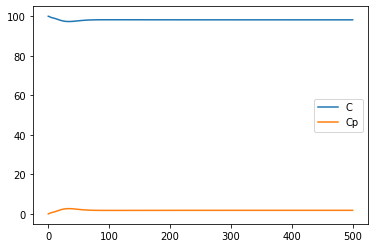

In [21]:
runner = roadrunner.RoadRunner(model.get_sbml_model())
res = runner.simulate(0, 500, 100)


states = model.get_state_variables().keys()

visible_states = ['C', 'Cp']

for s in visible_states:
    # print(s)
    plt.plot(res['time'], res[f'[{s}]'], label=s)

plt.legend()
plt.show()

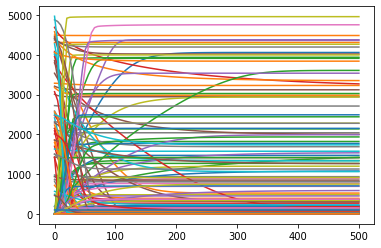

In [12]:
for s in states:
    # print(s)
    plt.plot(res['time'], res[f'[{s}]'], label=s)

# plt.legend()
plt.show()

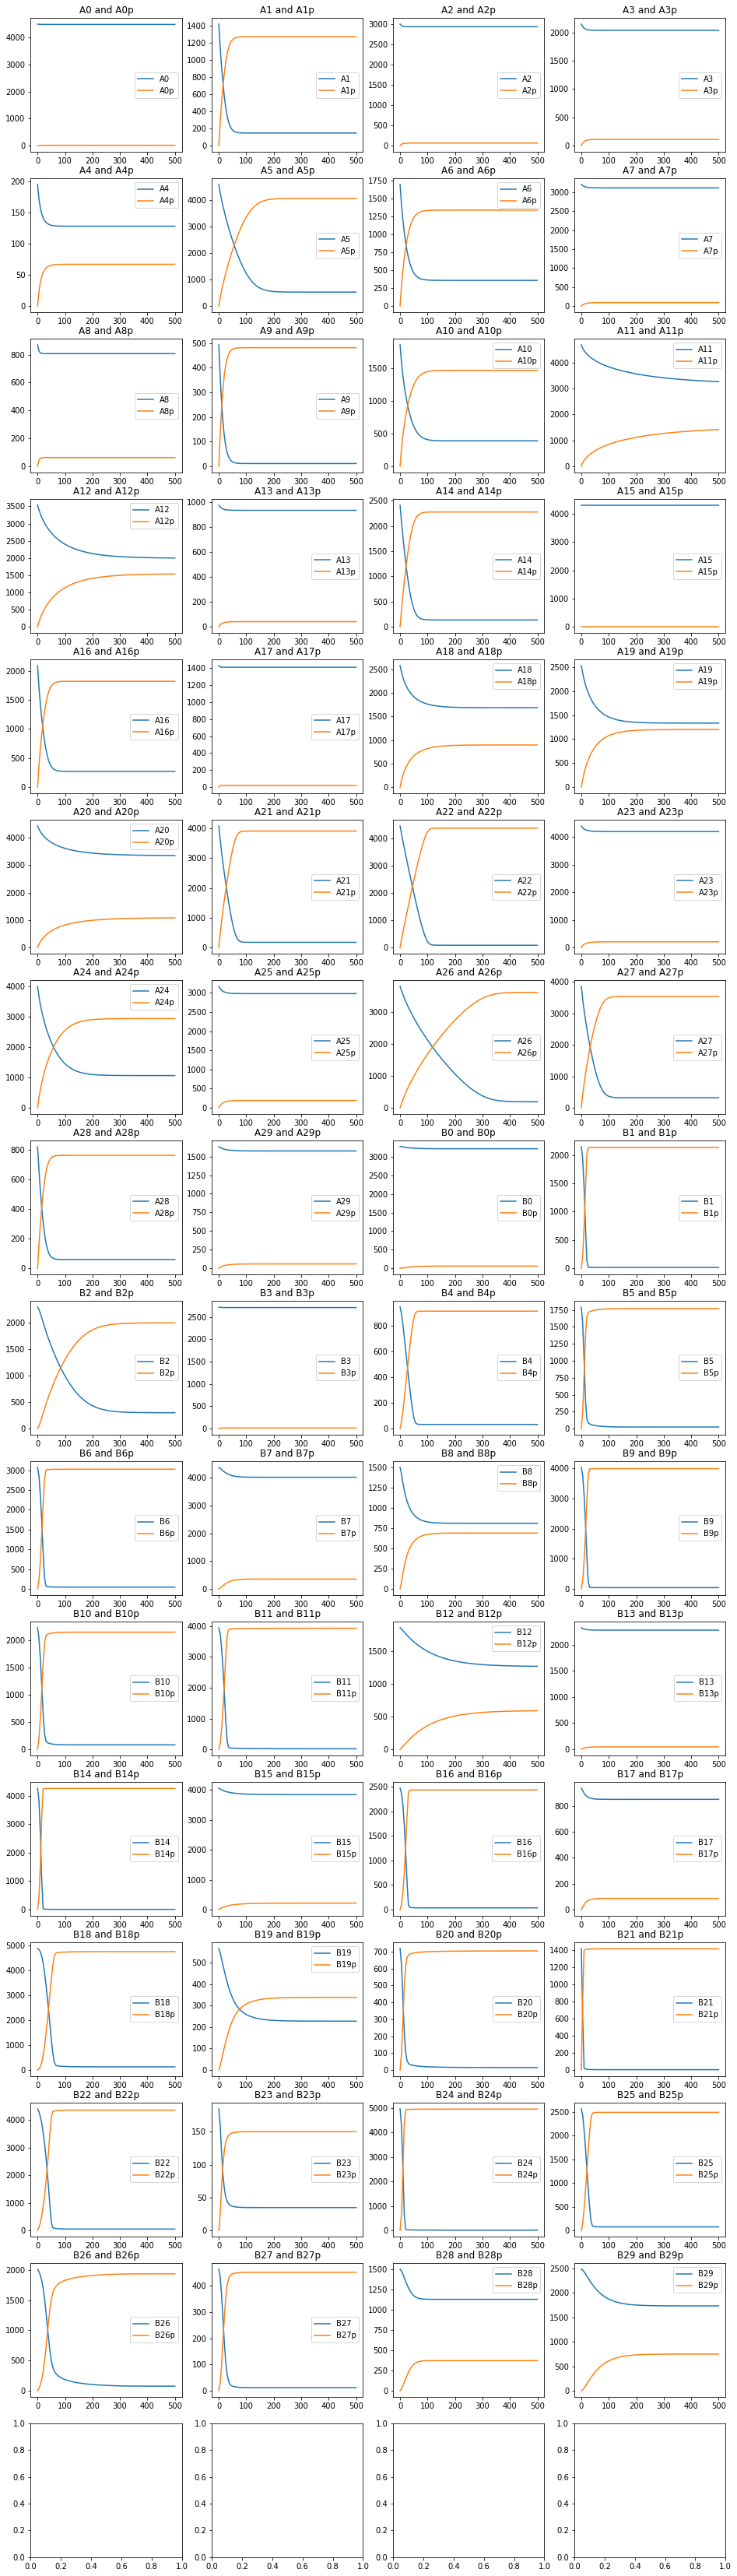

In [13]:
# make a multi-plot of the species, for each individual plot, show the species and the phosphorylated species

# use multiple subplots to show the species and the phosphorylated species for A and B
# ensure that the phosphorylated species are shown in the same plot as the original species

# create a subplot for each species, display 4 species per row
AandB = A_species + B_species
columns = 4
fig, axs = plt.subplots(len(AandB)//columns+1, columns, figsize=(4*columns, 4*len(AandB)//columns))

for i, specie in enumerate(AandB):
    row = i // columns
    col = i % columns
    
    # get the phosphorylated specie
    specie_phos = specie + 'p'
    
    # plot the specie
    axs[row, col].plot(res['time'], res[f'[{specie}]'], label=specie)
    axs[row, col].plot(res['time'], res[f'[{specie_phos}]'], label=specie_phos)
    axs[row, col].set_title(f'{specie} and {specie_phos}')
    axs[row, col].legend()
    
plt.show()


     

### Generation of Synthetic Data 

By perturbing the model using sampling methods, a sample dataset is generated, where feature data is the initial values of A and the target being the value of C at a time threshold 

In [199]:
## Perturbation sampling parameters
perturbationScale_range = (0.1, 10) # each parameter is perturbed by a random value between 0.1 and 10
num_pertrubations = 100


# grab the initial values of all A species
initial_values = {}
for s in A_species:
    initial_values[s] = runner.getValue(f'init({s})')
    # print(s, runner[s])

for s in B_species:
    initial_values[s] = runner.getValue(f'init({s})')

all_perturbed_values = []
for i in range(num_pertrubations):
    perturbed_values = {}
    for s in A_species:
        perturbed_values[s] = initial_values[s] * np.random.uniform(perturbationScale_range[0], perturbationScale_range[1])
        
    for s in B_species:
        perturbed_values[s] = initial_values[s] * np.random.uniform(perturbationScale_range[0], perturbationScale_range[1])
    
    all_perturbed_values.append(perturbed_values)
    
# put the perturbed values into a dataframe
feature_df = pd.DataFrame(all_perturbed_values)
feature_df.head()
    
    
    


,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29
0,38768.850931,3376.685156,19104.553887,14514.524113,1467.688620,42835.662734,5165.791318,2305.157892,4791.324039,904.330243,...,1161.908178,13127.246329,40803.395727,1050.513719,25582.303567,13812.036794,1257.668022,3173.215533,9163.335179,7878.400151
1,35598.261551,7875.401745,21851.985136,17661.086899,195.624231,36890.885152,6797.513120,5277.438096,7597.728190,180.363163,...,5714.359956,13032.936596,43014.631044,1351.752368,36515.661640,6211.009437,11851.735269,1296.765504,10017.468953,15577.859101
2,32366.302424,9420.292066,29535.329081,14651.835694,1727.369643,18189.599700,578.592500,6855.881948,945.553193,2782.698594,...,616.649086,5077.624372,26438.841072,1542.762467,12414.965642,16834.907448,18069.447717,335.998104,14114.282614,576.614309
3,14138.163112,9744.212313,25467.864869,19374.916881,1379.989858,7929.805220,16428.119070,7875.652143,3359.733623,2411.357421,...,2031.654601,12531.300081,33447.168583,823.806060,10888.470700,19802.119711,5419.819404,4209.478936,3056.157584,11737.020036
4,30830.882786,3918.559860,3806.974483,5022.389970,196.834839,23069.426780,8277.780119,19513.838474,6237.856146,1988.122345,...,4845.141746,5829.061533,31108.145602,1137.239564,38649.662934,21413.005537,12952.107937,2923.406221,8182.841565,4126.746742


In [200]:
# iterate the dataframe and simulate each perturbation
all_perturbed_results = []
time_course_data = []

for i in range(feature_df.shape[0]):
    # Reset rr model and simulate with each perturbation
    runner.reset()
    perturbed_values = feature_df.iloc[i]

    # set the perturbed values
    for s in A_species:
        runner[f'init({s})'] = perturbed_values[s]
        
    for s in B_species:
        runner[f'init({s})'] = perturbed_values[s]

    # simulate the model and grab only the C and Cp values at the end
    res = runner.simulate(0, 500, 100)
    perturbed_results = {}
    for c in C_species:
        perturbed_results[f'{c}p'] = runner.getValue(f'{c}p')
    all_perturbed_results.append(perturbed_results)
    
    # store the run of Cp into time_course_data
    time_course_data.append(res['[Cp]'])
    
    
target_df = pd.DataFrame(all_perturbed_results)
target_df.head()
        

,Cp
0,2.822080
1,1.038647
2,1.437198
3,2.003035
4,2.117643


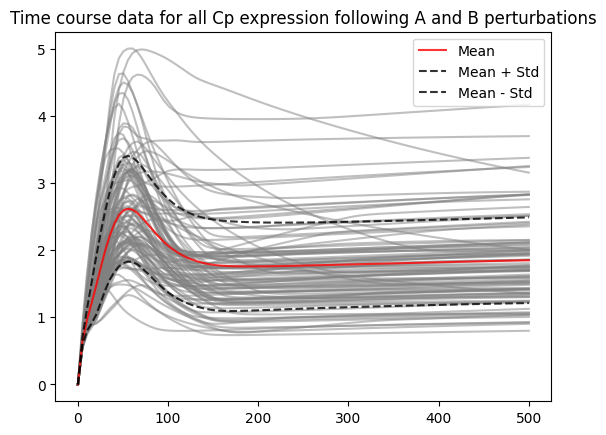

In [201]:
# plot the time course data
time_course_data = np.array(time_course_data)
time_course_data.shape

plt.title('Time course data for all Cp expression following A and B perturbations')
plt.plot(res['time'], time_course_data.T, color='gray', alpha=0.5)
plt.plot(res['time'], time_course_data.mean(axis=0), color='red', label='Mean', alpha=0.8)
plt.plot(res['time'], time_course_data.mean(axis=0) + time_course_data.std(axis=0), color='black', label='Mean + Std', alpha=0.8, linestyle='--')
plt.plot(res['time'], time_course_data.mean(axis=0) - time_course_data.std(axis=0), color='black', label='Mean - Std', alpha=0.8, linestyle='--')
plt.legend()
plt.show()

### Generation of sub-optimal estimated models 

If the first generated model is treated as the ground truth model S0 (i.e. the true reality of cell signalling), sub-optimal models, S1, S2... are generated as estimates of the ground truth

#### Manual Trimming of an established network

In [41]:
'''
First create a ground truth model with a known set of parameters 
'''

model_spec = ModelSpecification()
model_spec.generate_specifications(4, 5, 2, verbose=0)
G0 = model_spec.generate_network('GroundTruthModel', (5, 5000), (0.1, 10), (0.7, 1.3), random_seed=4)

Model States:  22
Model Parameters:  56
Model Reactions:  22


--- Antimony Model ---


model GroundTruthModel

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; (J3_Vmax+Cp*J3_Kw0)*A1/(J3_Km + A1)
J4: A2p -> A2; J4_Vmax*A2p/(J4_Km + A2p)
J5: A2 -> A2p; J5_Vmax*A2/(J5_Km*(1+B0p*J5_Kic0) + A2)
J6: A3p -> A3; J6_Vmax*A3p/(J6_Km + A3p)
J7: A3 -> A3p; J7_Vmax*A3/(J7_Km + A3)
J8: A4p -> A4; J8_Vmax*A4p/(J8_Km + A4p)
J9: A4 -> A4p; J9_Vmax*A4/(J9_Km + A4)
J10: B0p -> B0; J10_Vmax*B0p/(J10_Km + B0p)
J11: B0 -> B0p; (J11_Vmax+A0p*J11_Kw0)*B0/(J11_Km + B0)
J12: B1p -> B1; J12_Vmax*B1p/(J12_Km + B1p)
J13: B1 -> B1p; (J13_Vmax+A1p*J13_Kw0)*B1/(J13_Km + B1)
J14: B2p -> B2; J14_Vmax*B2p/(J14_Km + B2p)
J15: B2 -> B2p; (J15_Vmax+A2p*J15_Kw0)*B2/(J15_Km + B2)
J16: B3p -> B3; J16_Vmax*B3p/(J16_Km + B3p)
J17: B3 -> B3p; (J17_Vmax+A3p*J17_Kw0)*B3/(J17_Km + B3)
J18: B4p -> B4; J18_Vmax*B4p/(J18_Km + B4p)
J19: B4 -> B4p; 

In [42]:
print(model_spec)

A Species: ['A0', 'A1', 'A2', 'A3', 'A4']
B Species: ['B0', 'B1', 'B2', 'B3', 'B4']
C Species: ['C']
Regulations: [('C', 'A1'), ('B0', 'A2'), ('A0', 'B0'), ('A1', 'B1'), ('A2', 'B2'), ('A3', 'B3'), ('A4', 'B4')]
Regulation Types: ['up', 'down', 'up', 'up', 'up', 'up', 'up']
C Weak Stimulators: 2
C Strong Stimulators: 0
C Allosteric Inhibitors: 1
C Competitive Inhibitors: 2



In [43]:
'''
Then, create a new regulation list for the suboptimal model, S1 
'''

from copy import deepcopy

sub_regulations = model_spec.regulations[NR+1:]
sub_reg_types = model_spec.regulation_types[NR+1:]

print(sub_regulations)
print(sub_reg_types)

copy_model_spec = deepcopy(model_spec)

copy_model_spec.regulations = sub_regulations
copy_model_spec.regulation_types = sub_reg_types

print(copy_model_spec)

S0 = copy_model_spec.generate_network('SuboptimalModel', (5, 5000), (0.1, 10), (0.7, 1.3), random_seed=4, verbose=0)

G_params = G0.parameters.copy()
G_states = G0.states.copy()

# 
for p in G_params:
    if p in S0.parameters:
        S0.parameters[p] = G0.parameters[p]

for s in G_states:
    if s in S0.states:
        S0.states[s] = G0.states[s]
    
print(S0.get_antimony_model())


[('B0', 'A2'), ('A0', 'B0'), ('A1', 'B1'), ('A2', 'B2'), ('A3', 'B3'), ('A4', 'B4')]
['down', 'up', 'up', 'up', 'up', 'up']
A Species: ['A0', 'A1', 'A2', 'A3', 'A4']
B Species: ['B0', 'B1', 'B2', 'B3', 'B4']
C Species: ['C']
Regulations: [('B0', 'A2'), ('A0', 'B0'), ('A1', 'B1'), ('A2', 'B2'), ('A3', 'B3'), ('A4', 'B4')]
Regulation Types: ['down', 'up', 'up', 'up', 'up', 'up']
C Weak Stimulators: 2
C Strong Stimulators: 0
C Allosteric Inhibitors: 1
C Competitive Inhibitors: 2

model SuboptimalModel

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; J3_Vmax*A1/(J3_Km + A1)
J4: A2p -> A2; J4_Vmax*A2p/(J4_Km + A2p)
J5: A2 -> A2p; J5_Vmax*A2/(J5_Km*(1+B0p*J5_Kic0) + A2)
J6: A3p -> A3; J6_Vmax*A3p/(J6_Km + A3p)
J7: A3 -> A3p; J7_Vmax*A3/(J7_Km + A3)
J8: A4p -> A4; J8_Vmax*A4p/(J8_Km + A4p)
J9: A4 -> A4p; J9_Vmax*A4/(J9_Km + A4)
J10: B0p -> B0; J10_Vmax*B0p/(J10_Km + B0p)
J11: B0 -> B0p; (J11_Vmax+A0p*J11_K

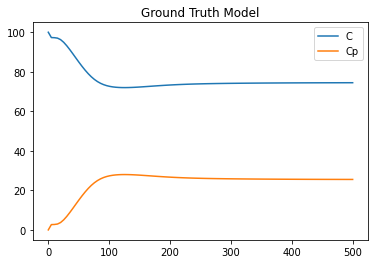

In [44]:
runner = roadrunner.RoadRunner(G0.get_sbml_model())
res = runner.simulate(0, 500, 100)


states = model.get_state_variables().keys()

visible_states = ['C', 'Cp']

for s in visible_states:
    # print(s)
    plt.plot(res['time'], res[f'[{s}]'], label=s)

plt.title('Ground Truth Model')
plt.legend()
plt.show()

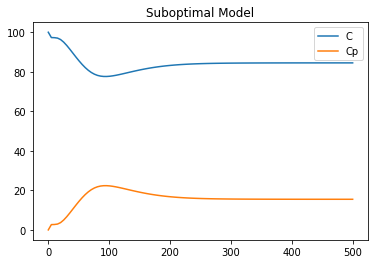

In [45]:
runner = roadrunner.RoadRunner(S0.get_sbml_model())
res = runner.simulate(0, 500, 100)


states = model.get_state_variables().keys()

visible_states = ['C', 'Cp']

for s in visible_states:
    # print(s)
    plt.plot(res['time'], res[f'[{s}]'], label=s)

plt.title('Suboptimal Model')
plt.legend()
plt.show()

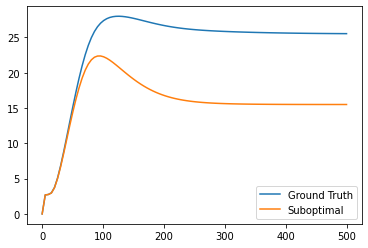

In [46]:
# make a sub-plot for the ground truth model and the suboptimal model, showing the Cp expression for C

runner = roadrunner.RoadRunner(G0.get_sbml_model())
res = runner.simulate(0, 500, 100)

runner_sub = roadrunner.RoadRunner(S0.get_sbml_model())
res_sub = runner_sub.simulate(0, 500, 100)

plt.plot(res['time'], res['[Cp]'], label='Ground Truth')
plt.plot(res_sub['time'], res_sub['[Cp]'], label='Suboptimal')
plt.legend()
plt.show()

#### Automatic random removal of feedback regulations in the network 

In [47]:
removal_rate = 0.1 # 10% of the regulations are removed

## Testing

In [28]:
import pickle 

# load a model from a file
path = 'models\examples\InterestingSmallModel.pkl'

with open(path, 'rb') as f:
    model = pickle.load(f)
    
print(model.get_antimony_model())

model FeedbackRegulationTwoLayerCascade

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; J3_Vmax*A1/(J3_Km + A1)
J4: B0p -> B0; J4_Vmax*B0p/(J4_Km + B0p)
J5: B0 -> B0p; J5_Vmax*B0*(B1p*J5_Ka0+A0p*J5_Ka1)/(J5_Km + B0)
J6: B1p -> B1; J6_Vmax*B1p/(J6_Km + B1p)
J7: B1 -> B1p; J7_Vmax*B1*(A1p*J7_Ka0)/(J7_Km + B1)
J8: Cp -> C; J8_Vmax*Cp/(J8_Km + Cp)*(1+B0p*J8_Kil0+B1p*J8_Kil1)
J9: C -> Cp; J9_Vmax*C/(J9_Km + C)

# State variables in the system
A0p=0
A0=401
A1p=0
A1=368
B0p=0
B0=217
B1p=0
B1=82
Cp=0
C=100

# Parameters in the system
J0_Km=0.11308826937964322
J0_Vmax=0.10423104330018418
J1_Km=0.36111165521658894
J1_Vmax=0.6625570773015934
J2_Km=0.2836910939087057
J2_Vmax=0.9571689212989276
J3_Km=0.9745409005613707
J3_Vmax=0.25138528373951285
J4_Km=0.4577479785335925
J4_Vmax=0.9306779909751701
J5_Km=0.10005787370788854
J5_Vmax=0.3271690786422303
J5_Ka0=0.3932672538669342
J5_Ka1=0.20320769949484951
J6_Km=0.4

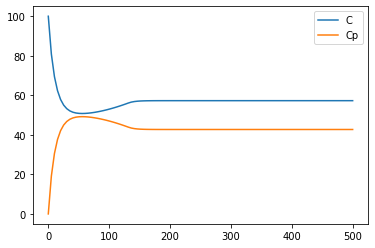

In [29]:
runner = roadrunner.RoadRunner(model.get_sbml_model())
res = runner.simulate(0, 500, 100)


states = model.get_state_variables().keys()

visible_states = ['C', 'Cp']

for s in visible_states:
    # print(s)
    plt.plot(res['time'], res[f'[{s}]'], label=s)

plt.legend()
plt.show()